#### histogram comparing the energy from the pairwise model with the energy of the MCM for the same digit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")
from pairwise.src.pairwise_fitter import Pairwise_fitter
from pairwise.src.pairwise_evaluator import Pairwise_evaluator
import importlib
import src.paper_utils as utils
import src.plot as myplot
import pairwise.src.pairwise_utils as pwutils

In [76]:
importlib.reload(myplot)
importlib.reload(utils)
importlib.reload(pwutils)

<module 'pairwise.src.pairwise_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots_pw/../../pairwise/src/pairwise_utils.py'>

In [4]:
nspin = 121
model_digits = [0,1]
sample_sizes = [4000]
testdatas = [np.genfromtxt(utils.load_test_data(digit), dtype=int, delimiter=1) for digit in model_digits]

In [ ]:
# # pairwise 
# # outdir = "../data/OUTPUT/pairwise/OUTPUT_mod"
# outdir = f"../data/OUTPUT/pairwise/OUTPUT_mod_rise/{sample_sizes}/1" #first run

# pw_mods = [pwutils.get_pw_mod(i,nspin,outdir) for i in model_digits] # both models were stopped after 100 iterations of the ACE algorithm, 4k samples

# pairwise_distrs = np.empty((2,2,len(testdatas[0])))
# for i_dig, testdig in enumerate(testdatas):
#     for i_md, mod in enumerate(pw_mods):
#         pairwise_distrs[i_md,i_dig,:] = np.array([mod.calc_energy(state) for state in testdig])


In [101]:
# pairwise 
outdir = "../data/OUTPUT/pairwise/OUTPUT_mod"
outdir = f"../data/OUTPUT/pairwise/OUTPUT_mod_rise/train/{sample_sizes[0]}/2" #first run

# outdir = f"../data/OUTPUT/pairwise/OUTPUT_mod_rise/full/6000/10k" #first run

fe = f"_rise.dat"
fname = "full-images-unlabeled-{}"

pw_mods = [pwutils.get_pw_mod(i,nspin,outdir, fileend=fe, fname=fname) for i in model_digits] # both models were stopped after 100 iterations of the ACE algorithm, 4k samples

pairwise_distrs = np.empty((2,2,len(testdatas[0])))
for i_dig, testdig in enumerate(testdatas):
    for i_md, mod in enumerate(pw_mods):
        pairwise_distrs[i_md,i_dig,:] = np.array([mod.calc_energy(state) for state in testdig])


In [87]:
counts_samplesizes, mcms_samplesizes = utils.load_counts_mcm(sample_sizes, letter="", path_format="../data/OUTPUT/mcm/sample_sizes")
test_mcms, test_probs = utils.get_complete_testprobs(mcms_samplesizes,counts_samplesizes,sample_sizes,n_runs=2,smooth=True)


In [103]:
# mcm

sample_idx = 0
run_idx = 0
all_byk_pair, _ = utils.get_all_byk_pair(test_probs, test_mcms, model_digits, sample_idx, run_idx)
mcm_distr = np.empty((2,2,len(testdatas[0])))
for i_dig, testdig in enumerate(testdatas):
    for i_md, mod in enumerate(all_byk_pair):
        mcm_distr[i_md,i_dig,:] = np.log(mod[-1,:,i_dig]) #NOTE. 1. -1 = full model. 2. This is the log probability.

#### Get same plot for mcm

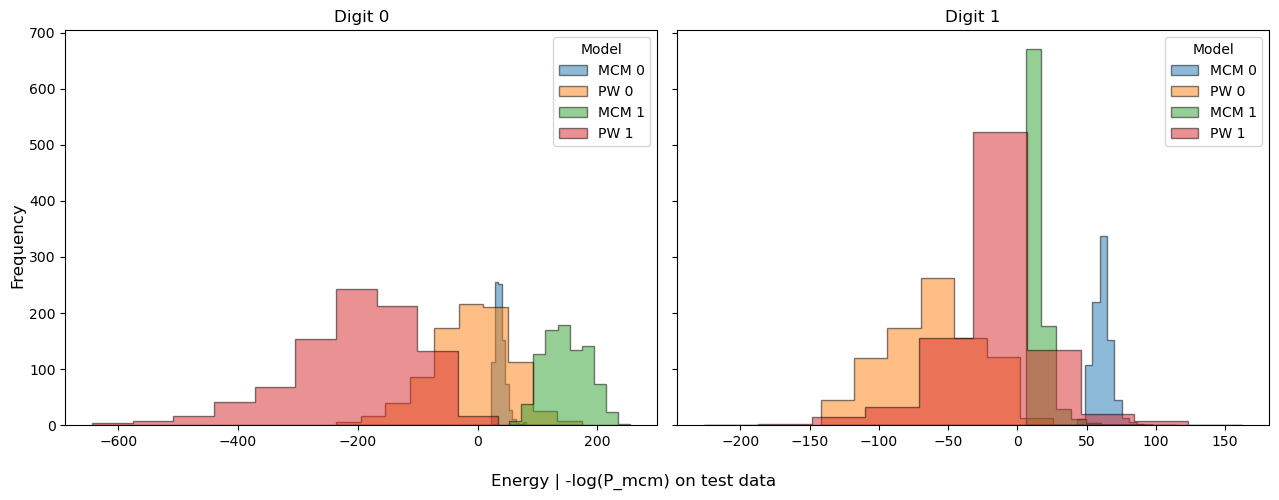

In [107]:
### Now we combine the two



model_digits = [0,1]

fig, axs = plt.subplots(1,2,sharey=True,figsize=((13,5)))

for i_dig, testdig in enumerate(testdatas):
    ax = axs[i_dig]
    see_dig = model_digits[i_dig]
    for i_md, mod in enumerate(all_byk_pair):

        ax.hist(mcm_distr[i_md,i_dig,:]*-1,label=f"MCM {i_md}",alpha=.5,histtype="stepfilled",edgecolor="black")
        ax.hist(pairwise_distrs[i_md,i_dig],label=f"PW {i_md}",alpha=.5,histtype="stepfilled",edgecolor="black")

    ax.set_title(f"Digit {see_dig}")
    ax.legend(title="Model")
fig.supxlabel("Energy | -log(P_mcm) on test data")
fig.supylabel("Frequency")
# fig.suptitle("PW model build")
fig.tight_layout()
plt.show()

Do both models produce the same values?: MCM vs PW scatter

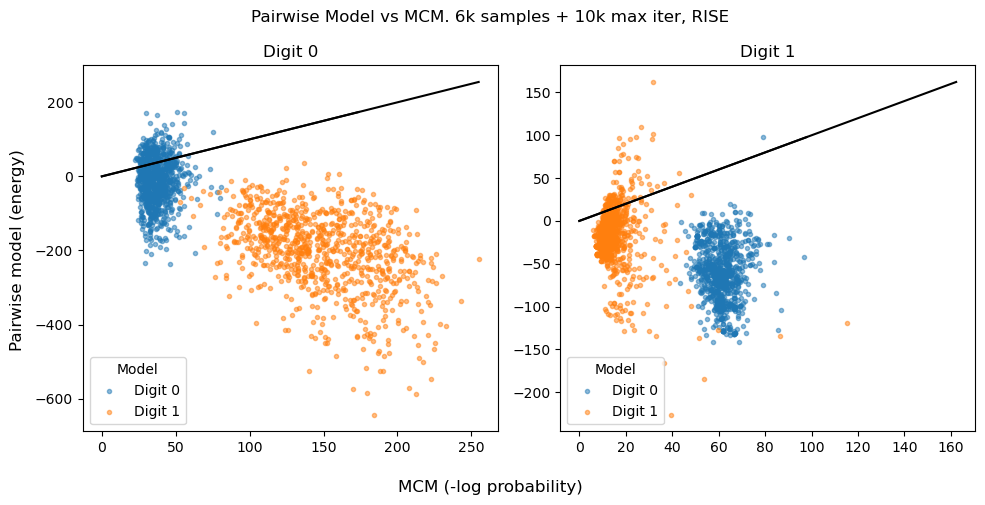

In [106]:
# lets scatter all points of both categories. Make them different colors based on point and x = MCM y = PW

### Now we combine the two



model_digits = [0,1]

fig, axs = plt.subplots(1,2,figsize=((10,5)))

for i_dig, testdig in enumerate(testdatas):
    ax = axs[i_dig]
    see_dig = model_digits[i_dig]
    for i_md, mod in enumerate(all_byk_pair):

        ax.scatter(mcm_distr[i_md,i_dig,:]*-1,pairwise_distrs[i_md,i_dig],label=f"Digit {i_md}",alpha=.5,marker=".")
        lm =  np.max([np.max(arr) for arr in (mcm_distr[i_md,i_dig,:]*-1,pairwise_distrs[i_md,i_dig])])
        ax.plot((0,lm),(0,lm),color="black")
        # ax.set(adjustable='box', aspect='equal')

    ax.set_title(f"Digit {see_dig}")
    ax.legend(title="Model")
fig.supxlabel("MCM (-log probability)")
fig.supylabel("Pairwise model (energy)")
fig.suptitle("Pairwise Model vs MCM. 6k samples + 10k max iter, RISE")
fig.tight_layout()